# Global Forest Watch Data Set

## Preamble

In [1]:
import requests
import io
from PIL import Image

## Downloader

Example URLS:

https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_treecover2000_00N_080W.tif

https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_gain_00N_080W.tif

https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_lossyear_00N_080W.tif

https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_datamask_00N_080W.tif

https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_first_00N_080W.tif

https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_last_00N_080W.tif

In [2]:
base_url = "https://storage.googleapis.com/earthenginepartners-hansen"
data_version = "GFC-2018-v1.6"
prefix = f"Hansen_{data_version}"
layers = [
    "treecover2000",
    "gain",
    "lossyear",
    "datamask",
    "first",
    "last"
]
coodinates = (lat, lon) = ("00N", "080W")

In [3]:
urls = [
    f"{base_url}/{data_version}/{prefix}_{lat}_{lon}.tif"
    for layer in layers
]

In [4]:
def generate_urls(lat, lon, layers=layers):
    """Generate download URL for the square at latitude/longitude """
    base_url = "https://storage.googleapis.com/earthenginepartners-hansen"
    data_version = "GFC-2018-v1.6"
    prefix = f"Hansen_{data_version}"
    layers = [
        "treecover2000",
        "gain",
        "loss",
        "lossyear",
        "datamask",
        "first",
        "last"
    ]
    img_urls = [ f"{base_url}/{data_version}/{prefix}_{layer}_{lat}_{lon}.tif" for layer in layers]
    return img_urls

In [5]:
generate_urls("00N", "080W")

['https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_treecover2000_00N_080W.tif',
 'https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_gain_00N_080W.tif',
 'https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_loss_00N_080W.tif',
 'https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_lossyear_00N_080W.tif',
 'https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_datamask_00N_080W.tif',
 'https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_first_00N_080W.tif',
 'https://storage.googleapis.com/earthenginepartners-hansen/GFC-2018-v1.6/Hansen_GFC-2018-v1.6_last_00N_080W.tif']

In [6]:
Image.MAX_IMAGE_PIXELS = None  # disable DecompressionBomError safety mechanism

In [7]:
def download_forest_watch(lat, lon, layers=layers):
    img_urls = generate_urls(lat, lon, layers)
    images = []
    for img_url in img_urls:
        response = requests.get(img_url)
        img = Image.open(
            io.BytesIO(
                response.content
            )
        )
        images.append(img)
    return images

## Loss Image

In [14]:
data_dir = "../data/GlobalForestWatch"

In [31]:
file_name = "Hansen_GFC2015_loss_00N_050W.tif"

### as .tif image with PIL (deprecated)

In [32]:
%%time
loss_img = Image.open(f"{data_dir}/{file_name}")

CPU times: user 2.15 ms, sys: 7.08 ms, total: 9.23 ms
Wall time: 12.2 ms


In [33]:
import matplotlib.pyplot as plt

In [35]:
loss_img = loss_img.resize((1000, 1000))

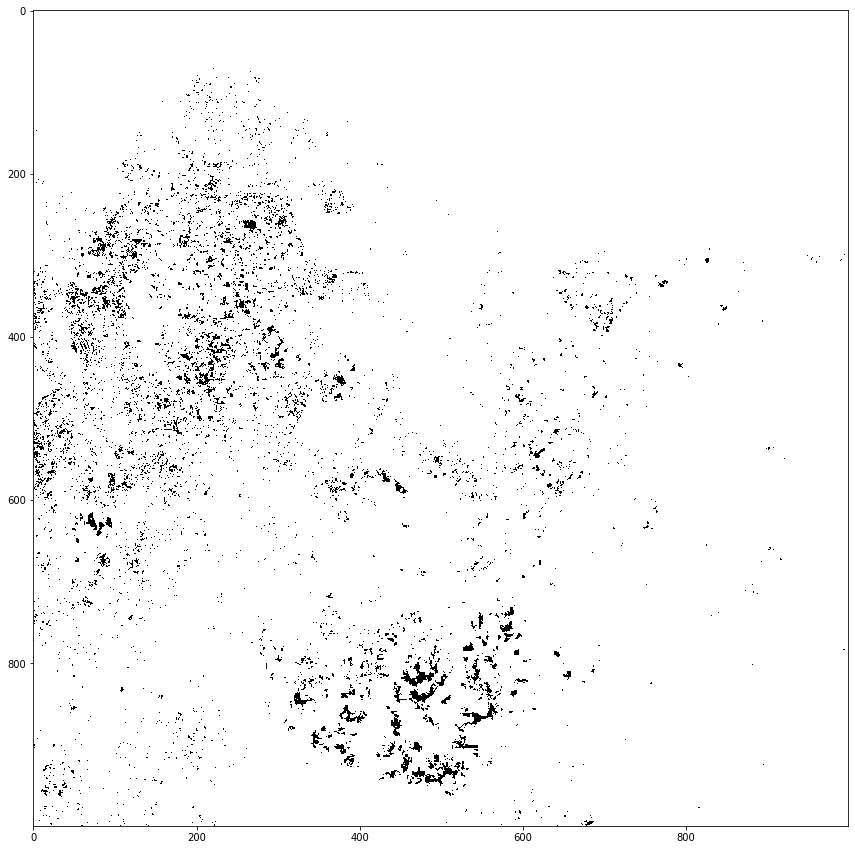

In [36]:
plt.figure(figsize=(15,15))
plt.imshow(loss_img, cmap="Greys")

### as GeoTIFF with rasterio

In [39]:
import rasterio

In [46]:
loss_data = rasterio.open(f"{data_dir}/{file_name}")
loss_data

<open DatasetReader name='../data/GlobalForestWatch/Hansen_GFC2015_loss_00N_050W.tif' mode='r'>

the bounding box of the image in geographic coordinates:

In [47]:
loss_data.bounds

BoundingBox(left=-50.0, bottom=-10.0, right=-40.0, top=0.0)

the coordinate of the left upper corner:

In [45]:
anchor_coord = loss_data.transform * (0, 0)
anchor_coord

(-50.0, 0.0)

In [49]:
from rasterio.plot import show

In [60]:
loss_img = loss_data.read(
        out_shape=(
            loss_data.count,
            int(loss_data.height * 0.2),
            int(loss_data.width * 0.2)
        )
)

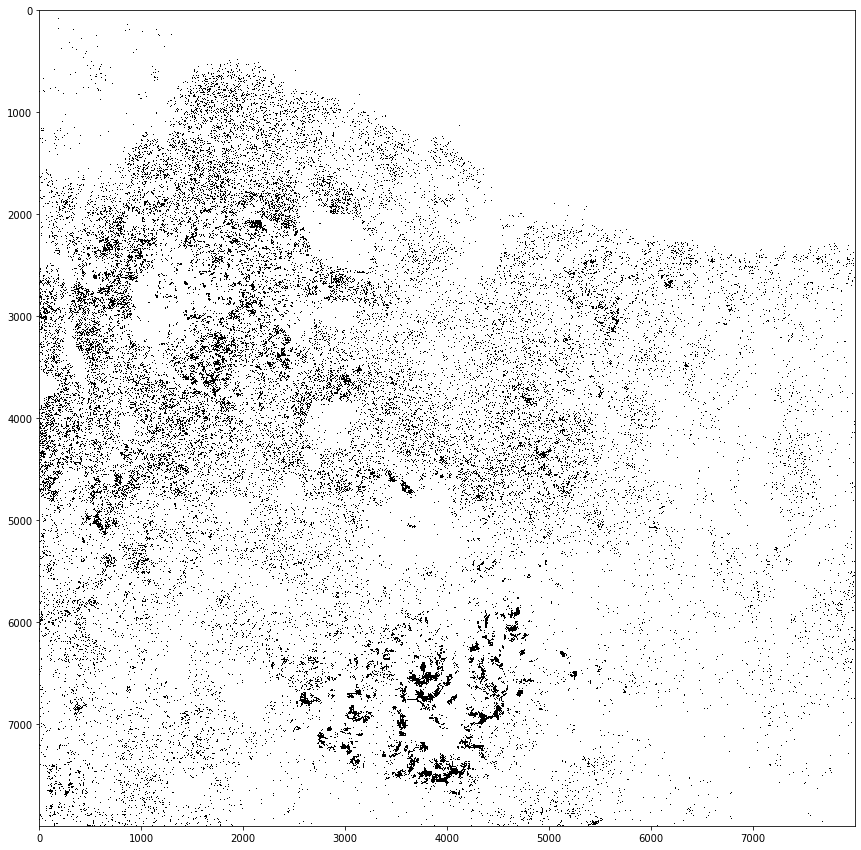

In [61]:
plt.figure(figsize=(15,15))
show(loss_img, cmap="Greys")